# Ecosistema actual, Huggingface y modelos pre entrenados.

---

# Modelos:

## 1. [Swin Transformer](https://huggingface.co/docs/transformers/model_doc/swin)
- **Tipo:** Transformer jerárquico.
- **Características:**
  - Utiliza ventanas deslizantes (windowed attention) para atención local.
  - Crea representaciones jerárquicas a partir de imágenes.
  - Mejora la escalabilidad en procesamiento de imágenes de alta resolución.

## 2. [Convolutional Vision Transformer (CvT)](https://huggingface.co/docs/transformers/model_doc/cvt)
- **Tipo:** Híbrido CNN y Transformer.
- **Características:**
  - Aplica convoluciones iniciales para captura de características locales.
  - Utiliza bloques de Transformer para modelar relaciones globales.
  - Eficiente en tareas de visión con reducción de complejidad computacional.

## 3. [MobileViT](https://huggingface.co/docs/transformers/model_doc/mobilevit)
- **Tipo:** Arquitectura eficiente para dispositivos móviles.
- **Características:**
  - Integra convoluciones y Transformers de forma modular.
  - Diseñada para balancear rendimiento y eficiencia en recursos limitados.
  - Optimizada para aplicaciones en tiempo real.

## 4. [Pyramid Vision Transformer](https://huggingface.co/docs/transformers/v4.45.2/en/model_doc/pvt#transformers.PvtForImageClassification)
- **Tipo:** Transformer con enfoque en múltiples escalas.
- **Características:**
  - Implementa arquitectura en pirámide para procesamiento de imágenes.
  - Captura información a diferentes resoluciones, mejorando la generalización.
  - Eficaz en la detección de características tanto finas como gruesas.


## 5. [Masked Autoencoder](https://huggingface.co/docs/transformers/v4.45.2/en/model_doc/vit_mae#vitmae)
- **Tipo:** Autoencoder con enmascaramiento.
- **Características:**
  - Enmascara partes de la imagen durante el entrenamiento para aprendizaje de características.
  - Similar al enmascaramiento en modelos de lenguaje como BERT.
  - Facilita la transferencia de conocimiento para tareas de preentrenamiento y finetuning.

---
---

# Guía para Trabajar con Modelos Preentrenados de Imágenes en Hugging Face con PyTorch



## 1. Preprocesamiento de los Datos

- **Redimensionamiento y normalización**: La clase `ImageProcessor` ajusta automáticamente la imagen a las dimensiones que el modelo necesita.

    ```python
    from transformers import AutoImageProcessor
    processor = AutoImageProcessor.from_pretrained("google/vit-base-patch16-224")
    inputs = processor(images=image, return_tensors="pt")
    ```

- **Augmentación de datos**: Puedes usar librerías como `torchvision` para agregar augmentación de datos y mejorar el rendimiento del modelo.

    ```python
    import torchvision.transforms as transforms
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor()
    ])
    ```
---

## 2. Trabajando con Modelos Preentrenados de Imágenes

### Pasos para usar modelos preentrenados:

1. **Instalación de librerías**: Hace falta tener instalada la librería `transformers` de Hugging Face, ya que ofrece acceso a modelos preentrenados y procesadores para el preprocesamiento de datos.

2. **Cargar el modelo y el procesador**: Se utiliza `AutoImageProcessor` para cargar el procesador que realizará el preprocesamiento de las imágenes (ajustes de tamaño, normalización, etc.), y por ejemplo `AutoModelForImageClassification` para cargar el modelo de clasificación preentrenado.

    ```python
    from transformers import AutoImageProcessor, AutoModelForImageClassification
    processor = AutoImageProcessor.from_pretrained("google/vit-base-patch16-224")
    model = AutoModelForImageClassification.from_pretrained("google/vit-base-patch16-224")
    ```

3. **Preprocesar las imágenes**: Se utiliza el procesador para convertir la imagen en un formato adecuado (tensor), que luego puede ser alimentado al modelo.

4. **Inferencia y uso de logits**: Los logits son los valores sin normalizar que el modelo genera para cada clase de salida. En una tarea de clasificación, estos logits indican qué tan seguro está el modelo de que una imagen pertenece a una clase específica. El índice del logit maximo corresponde a la clase predicha.

    **Ejemplo de uso de logits**:
    ```python
    inputs = processor(images=image, return_tensors="pt")  
    outputs = model(**inputs)  
    logits = outputs.logits
    ```

5. **Interpretar los logits**:  Para obtener la clase predicha, se toma el índice del logit más alto y se asocia con la etiqueta de la clase correspondiente.


    ```python
    predicted_class_idx = logits.argmax(-1).item()
     print(f"Predicción de clase: {model.config.id2label[predicted_class_idx]}")
    ```


---

## 3. Finetuning

El **finetuning** ajusta un modelo preentrenado para tareas específicas utilizando un conjunto de datos más pequeño. Esto se logra actualizando los pesos de las últimas capas.

### Pasos para realizar finetuning:


```python
from transformers import Trainer, TrainingArguments

# Argumentos de entrenamiento
training_args = TrainingArguments(
    output_dir="results path",
    evaluation_strategy="epoch",
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    save_strategy="epoch",
    logging_dir="login path",
)

# Definir Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=dataset_train,
    eval_dataset=dataset_test,
    tokenizer=processor
)

# Entrenamiento
trainer.train()
```

---

### Recursos:
- [Documentación de Hugging Face Transformers](https://huggingface.co/docs/transformers/index)
- [Procesamiento de Imágenes](https://huggingface.co/docs/transformers/main_classes/image_processor)
- [Entrenamiento y Finetuning](https://huggingface.co/docs/transformers/training)



---
---
# Tarea: Fine-tuning de un modelo Vision Transformer

1. **Objetivo**:
   Seleccione un modelo preentrenado que utilice Vision Transformers (ViTs) y un conjunto de datos adecuado. Realice un proceso de fine-tuning del modelo seleccionado.

   Pueden encontrar la documentacion de Transformers de Hugging Face en [Link](https://huggingface.co/docs/transformers/index)

   Datasets de imágenes en Hugging Face [Link](https://huggingface.co/datasets?modality=modality:image&sort=downloads)

   O pueden usar fuentes de preferencia.

   
2. **Una vez finalizado el fine-tuning**:
   - Justifique la elección del modelo preentrenado y del dataset.
   - Explique el proceso de fine-tuning realizado, especificando los parámetros ajustados y las modificaciones necesarias.
   - Evalúe el rendimiento del modelo preentrenado sin ajustes y compárelo con los resultados obtenidos tras el fine-tuning, discutiendo las mejoras o diferencias observadas.
---

A continuación sigue una pequeña ayuda:

In [ ]:
!pip install transformers datasets diffusers accelerate
!pip install --upgrade jupyter ipywidgets

### Otra forma de buscar los datos en HuggingFace

In [ ]:
from huggingface_hub import list_datasets, dataset_info
keywords = ["beans", "images", "MMU"]  # Lista de palabras clave
datasets = list_datasets()
dataset_details = []
for dataset in datasets:
    if any(keyword in dataset.id for keyword in keywords):
        try:
            info = dataset_info(dataset.id)
            dataset_details.append({
                "id": dataset.id,
                "downloads": getattr(info, 'downloads', 0),  # Cantidad de descargas, predeterminado 0
                "likes": getattr(info, 'likes', 0),
                "comments": getattr(info, 'comments', 0)
            })
        except Exception as e:
            print(f"Error al obtener información del dataset {dataset.id}: {e}")
sorted_datasets = sorted(dataset_details, key=lambda x: x['downloads'], reverse=True)
for dataset in sorted_datasets[:20]: # 20 datasets más descargados
    print(f"{dataset['id']}: {dataset['downloads']} descargas")

### Eligimos un set de datos y lo traemos

In [ ]:
from datasets import load_dataset, DownloadConfig
download_config = DownloadConfig(delete_extracted=True, download_desc=None)
dataset = load_dataset("AI-Lab-Makerere/beans")

In [ ]:
print(dataset)
print(dataset['train'].features)
print(dataset['train'][0])
print(dataset['train'].features['labels'].names)


print(f"Tamaño del conjunto de entrenamiento: {len(dataset['train'])}")
print(f"Tamaño del conjunto de validación: {len(dataset['validation'])}")
print(f"Tamaño del conjunto de prueba: {len(dataset['test'])}")

### Eligimos un modelo pre entrenado y lo traemos

Modelo Swin Transformer entrenado en [ImageNet-1K](https://www.image-net.org/about.php) con una resolución de 224x224.

Fue presentado en el artículo [Swin Transformer: Hierarchical Vision Transformer using Shifted Windows" de Liu et al](https://arxiv.org/abs/2103.14030).

Se lanzó por primera vez en este repositorio [Link](https://github.com/microsoft/Swin-Transformer)

In [ ]:
from transformers import AutoImageProcessor, SwinForImageClassification
import torch
import matplotlib.pyplot as plt
from PIL import Image


path = "../TP1/raccoon.jpg"
image = Image.open(path)


image_processor = AutoImageProcessor.from_pretrained("microsoft/swin-tiny-patch4-window7-224")
model = SwinForImageClassification.from_pretrained("microsoft/swin-tiny-patch4-window7-224")


inputs = image_processor(image, return_tensors="pt")

with torch.no_grad():
    logits = model(**inputs).logits

# model predicts one of the 1000 ImageNet classes
predicted_label = logits.argmax(-1).item()
predicted_class = model.config.id2label[predicted_label]


plt.imshow(image)
plt.axis('off')
plt.title(f'Predicted class: {predicted_class}')
plt.show()


# 1 - Fine-tuning de un modelo Vision Transformer

1. **Objetivo**:
   Seleccione un modelo preentrenado que utilice Vision Transformers (ViTs) y un conjunto de datos adecuado. Realice un proceso de fine-tuning del modelo seleccionado.

In [1]:
pip install datasets transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 10.9 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [2]:
# Dependencias
import torch
from torch.utils.data import DataLoader
from datasets import load_dataset
from transformers import ViTForImageClassification, ViTImageProcessor
from transformers import TrainingArguments, Trainer
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Selección del device
device =  'cuda' if torch.cuda.is_available() else 'mps' if torch.backends.mps.is_available() else 'cpu'
print(device) # Expected: ‘cuda’ if Linux else ‘mps’ if MacOS
device =  'cuda' if torch.cuda.is_available() else 'mps' if torch.backends.mps.is_available() else 'cpu'

cuda


## Conjunto de datos

Se selecciona Brain-Tumor-Classification (https://huggingface.co/datasets/sartajbhuvaji/Brain-Tumor-Classification/viewer/default/Training), que se trata de imágenes de tumores cerebralos con un muestras divididas en 2870 muestras de train y 394 muestras de test.

In [4]:
# Descargar los modelos
train_dataset = load_dataset('sartajbhuvaji/Brain-Tumor-Classification', split='Training[:]')
test_dataset = load_dataset('sartajbhuvaji/Brain-Tumor-Classification', split='Testing[:]')


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/310 [00:00<?, ?B/s]

Training.zip:   0%|          | 0.00/78.3M [00:00<?, ?B/s]

Testing.zip:   0%|          | 0.00/12.6M [00:00<?, ?B/s]

Generating Training split:   0%|          | 0/2870 [00:00<?, ? examples/s]

Generating Testing split:   0%|          | 0/394 [00:00<?, ? examples/s]

In [5]:
# Visualizar las features del conjunto de datos
train_dataset

Dataset({
    features: ['image', 'label'],
    num_rows: 2870
})

In [6]:
# Conversiones
id2label = {id:label for id, label in enumerate(train_dataset.features['label'].names)}
label2id = {label:id for id,label in id2label.items()}
id2label

{0: 'glioma_tumor', 1: 'meningioma_tumor', 2: 'no_tumor', 3: 'pituitary_tumor'}

Como modelo se elije el microsoft/swin-tiny-patch4-window7-224, con consiste en imágenes de 224x224 entrenado en ImageNet-1k, es decir con 1000 clases de salida. Se eligió este modelo de un tamaño no tan grande, debido a las limitadas capacidade de cómputo disponibles.

In [8]:
# Modelo
from transformers import AutoImageProcessor, SwinForImageClassification

processor = AutoImageProcessor.from_pretrained("microsoft/swin-tiny-patch4-window7-224")
model = SwinForImageClassification.from_pretrained("microsoft/swin-tiny-patch4-window7-224")

preprocessor_config.json:   0%|          | 0.00/255 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/71.8k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/113M [00:00<?, ?B/s]

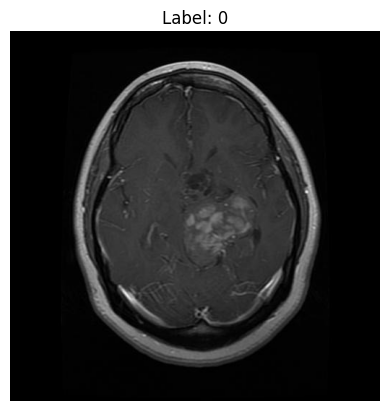

In [9]:
# Visualizar una imagen de ejemplo del dataset
item = train_dataset[0]

# Mostrar la imagen
plt.imshow(item['image'])
plt.title(f"Label: {item['label']}")
plt.axis('off')
plt.show()

In [10]:
torch.set_float32_matmul_precision("medium") # optimizacion

In [11]:
def preprocess_function(examples):
    inputs = processor(images=examples['image'], return_tensors="pt", padding=True)
    inputs['labels'] = torch.tensor([0] * len(examples['label']), dtype=torch.float)
    return inputs

In [12]:
# Transforma los datos
def transform(example):
    # Apply feature extractor transforms (resize, normalize, convert to tensor)
    inputs = processor(images=example['image'], return_tensors="pt")
    example['pixel_values'] = inputs['pixel_values'].squeeze()  # Remove extra dimension
    example['label'] = example['label']
    return example

# Uso de map para creación de dataset con los datos transformados
train_dataset = train_dataset.map(transform)
test_dataset = test_dataset.map(transform)


Map:   0%|          | 0/2870 [00:00<?, ? examples/s]

Map:   0%|          | 0/394 [00:00<?, ? examples/s]

In [13]:
# Se le cambia el formato a los datos
train_dataset.set_format(type='torch', columns=['pixel_values', 'label'])
test_dataset.set_format(type='torch', columns=['pixel_values', 'label'])

In [14]:
# Se observa que se tiene una feature adicional
test_dataset

Dataset({
    features: ['image', 'label', 'pixel_values'],
    num_rows: 394
})

In [15]:
# Verificar el cambio de formato
test_dataset['image'][0].size

(495, 619)

In [16]:
# Se observan los labels
train_dataset['label']

tensor([0, 0, 0,  ..., 3, 3, 3])

In [18]:
# El elemento del dataset tiene un label y sus pixel_values
train_dataset[0]

{'label': tensor(0),
 'pixel_values': tensor([[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          ...,
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179]],
 
         [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          ...,
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357]],
 
         [[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -

## Sin Fine-tuning

Se prueba el modelo directamente como se lo instanció sin actualizar sus pesos.

In [19]:
torch.cuda.empty_cache() # limpiamos cache

In [21]:
test_loader = DataLoader(test_dataset, batch_size=32)

# Mover el modelo a la GPU
model.to('cuda')

# Evaluate the model on test data
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for batch in test_loader:
        pixel_values = batch['pixel_values'].squeeze(1).float()
        outputs = model(pixel_values=pixel_values.to('cuda'))  # Forward pass
        predictions = torch.argmax(outputs.logits, dim=-1)
        correct += (predictions.to('cpu') == batch['label']).sum().item()
        total += batch['label'].size(0)

accuracy = correct / total
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Test Accuracy: 0.00%


Se observa que se tuvo 0% de accuracy, es decir que el modelo está preentrenado con imágenes que no son para nada similares a las que tenemos en el dataset de test, lo cual es lógico considerando que fue entrenado con Image-Net 1k.

## Fine-tuning

In [23]:
import os
os.environ["WANDB_DISABLED"] = "true" # no utilizamos weights and biases

In [54]:
# Entrenamiento
training_args = TrainingArguments(
    output_dir="./vit-finetuned-brain",
    evaluation_strategy="epoch",
    learning_rate=1e-5,
    per_device_train_batch_size=64,
    per_device_eval_batch_size=64,
    num_train_epochs=10,
    weight_decay=0.001,
    logging_dir='./logs',
    log_level = 'info',
    fp16 = True,
)

def compute_metrics(pred):
    labels = pred.label_ids
    preds = np.argmax(pred.predictions, axis=1)
    accuracy = np.mean(preds == labels)
    return {"accuracy": accuracy}

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics,
)

trainer.train()

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).
Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).
Using auto half precision backend
The following columns in the training set don't have a corresponding argument in `SwinForImageClassification.forward` and have been ignored: image. If image are not expected by `SwinForImageClassification.forward`,  you can safely ignore this m

Epoch,Training Loss,Validation Loss,Accuracy
1,No log,1.585687,0.720812
2,No log,1.642281,0.728426
3,No log,1.738021,0.733503
4,No log,1.877859,0.733503
5,No log,1.936440,0.736041
6,No log,1.994541,0.736041
7,No log,2.069161,0.738579
8,No log,2.073765,0.741117
9,No log,2.033036,0.748731
10,No log,2.094187,0.741117


The following columns in the evaluation set don't have a corresponding argument in `SwinForImageClassification.forward` and have been ignored: image. If image are not expected by `SwinForImageClassification.forward`,  you can safely ignore this message.

***** Running Evaluation *****
  Num examples = 394
  Batch size = 64
The following columns in the evaluation set don't have a corresponding argument in `SwinForImageClassification.forward` and have been ignored: image. If image are not expected by `SwinForImageClassification.forward`,  you can safely ignore this message.

***** Running Evaluation *****
  Num examples = 394
  Batch size = 64
The following columns in the evaluation set don't have a corresponding argument in `SwinForImageClassification.forward` and have been ignored: image. If image are not expected by `SwinForImageClassification.forward`,  you can safely ignore this message.

***** Running Evaluation *****
  Num examples = 394
  Batch size = 64
The following columns in 

TrainOutput(global_step=450, training_loss=0.0582422129313151, metrics={'train_runtime': 603.0349, 'train_samples_per_second': 47.593, 'train_steps_per_second': 0.746, 'total_flos': 7.332602062270464e+17, 'train_loss': 0.0582422129313151, 'epoch': 10.0})

In [55]:
# Evaluar los resultados
eval_results = trainer.evaluate()
print(eval_results)

The following columns in the evaluation set don't have a corresponding argument in `SwinForImageClassification.forward` and have been ignored: image. If image are not expected by `SwinForImageClassification.forward`,  you can safely ignore this message.

***** Running Evaluation *****
  Num examples = 394
  Batch size = 64


{'eval_loss': 2.0941872596740723, 'eval_accuracy': 0.7411167512690355, 'eval_runtime': 5.333, 'eval_samples_per_second': 73.88, 'eval_steps_per_second': 1.313, 'epoch': 10.0}


In [56]:
torch.cuda.empty_cache() # limpiamos cache

### Pruebas

In [57]:
test_loader = DataLoader(test_dataset, batch_size=32)

# Evaluate the model on test data
model.eval()  # Set model to evaluation mode
correct = 0
total = 0

with torch.no_grad():
    for batch in test_loader:
        pixel_values = batch['pixel_values'].squeeze(1).float()
        outputs = model(pixel_values=pixel_values.to('cuda'))  # Forward pass
        predictions = torch.argmax(outputs.logits, dim=-1)
        correct += (predictions.to('cpu') == batch['label']).sum().item()
        total += batch['label'].size(0)

accuracy = correct / total
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Test Accuracy: 74.11%


En el caso de realizar fine-tuning, se observa como se incrementa el valor de accuracy, por lo que aprende epoch a epoch, incluso con una baja cantidad de datos para este tipo de modelos.

In [58]:
# Infromación del modelo
model

SwinForImageClassification(
  (swin): SwinModel(
    (embeddings): SwinEmbeddings(
      (patch_embeddings): SwinPatchEmbeddings(
        (projection): Conv2d(3, 96, kernel_size=(4, 4), stride=(4, 4))
      )
      (norm): LayerNorm((96,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): SwinEncoder(
      (layers): ModuleList(
        (0): SwinStage(
          (blocks): ModuleList(
            (0-1): 2 x SwinLayer(
              (layernorm_before): LayerNorm((96,), eps=1e-05, elementwise_affine=True)
              (attention): SwinAttention(
                (self): SwinSelfAttention(
                  (query): Linear(in_features=96, out_features=96, bias=True)
                  (key): Linear(in_features=96, out_features=96, bias=True)
                  (value): Linear(in_features=96, out_features=96, bias=True)
                  (dropout): Dropout(p=0.0, inplace=False)
                )
                (output): SwinSelfOutput(
  

### Resultados

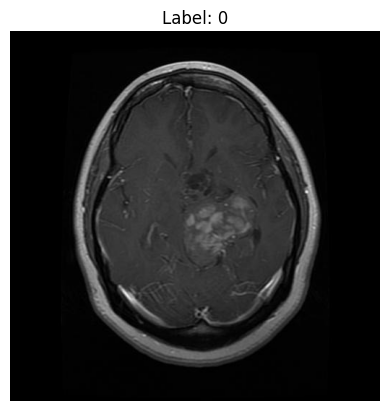

In [59]:
test_item = test_dataset[0]

# Display the image
plt.imshow(item['image'])
plt.title(f"Label: {item['label']}")
plt.axis('off')  # Hide the axes for clarity
plt.show()

In [60]:
# Tipo de dato de los pixel_values del test_item
type(test_item['pixel_values'])

torch.Tensor

In [61]:
def inference_prediction(image: torch.Tensor, clear_cache = False) -> torch.Tensor:
    with torch.no_grad():
        pixel_values = image.squeeze(1).float().unsqueeze(0)
        outputs = model(pixel_values=pixel_values.to(device))
        if clear_cache:
            torch.cuda.empty_cache() # libera memoria de la cache luego de inferencia
        return torch.argmax(outputs.logits, dim=-1)


In [62]:
inference_prediction(test_item['pixel_values']) == test_item["label"]

tensor([False], device='cuda:0')

Se observa que no realizó bien la predicción del test_item.

### Evaluacion con dataset de prueba

In [63]:
outputs = trainer.predict(test_dataset)

The following columns in the test set don't have a corresponding argument in `SwinForImageClassification.forward` and have been ignored: image. If image are not expected by `SwinForImageClassification.forward`,  you can safely ignore this message.

***** Running Prediction *****
  Num examples = 394
  Batch size = 64


In [64]:
# Métricas obtenidas
outputs.metrics

{'test_loss': 2.0941872596740723,
 'test_accuracy': 0.7411167512690355,
 'test_runtime': 5.2896,
 'test_samples_per_second': 74.486,
 'test_steps_per_second': 1.323}

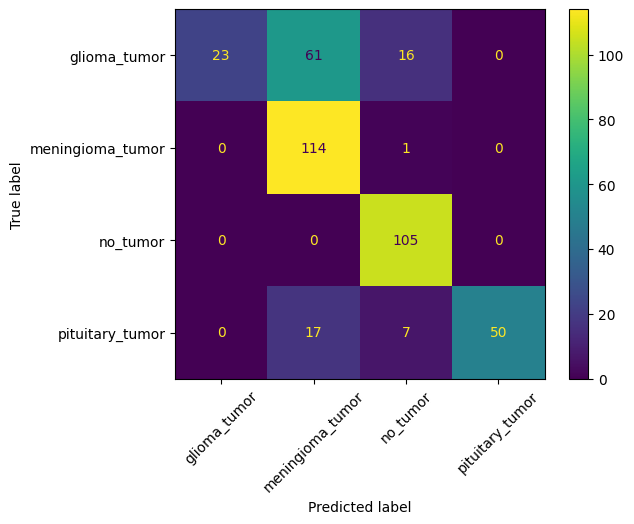

In [66]:
# Matriz de confusión
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_true = outputs.label_ids
y_pred = outputs.predictions.argmax(1)

labels = train_dataset.features['label'].names
y_pred_filtered = np.where(y_pred < len(labels), y_pred, -1)


cm = confusion_matrix(y_true, y_pred_filtered)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= labels )
disp.plot(xticks_rotation=45)

# 2 - Una vez finalizado el fine-tuning

   - Justifique la elección del modelo preentrenado y del dataset.

El modelo seleccionado es uno ViT de un tamaño no tan grande a comparación con otros del tipo Swine, como por ejemplo el entrenado con Image-Net 21k. Se eligió este debio a que no se tuvo mucho poder de cómputo disponible. El conjunto de datos se seleccionó debo al interés personal del uso de la IA en la medicina. En cuanto a la cantidad de datos, esta es pequeña para usar en un ViT, pero como no se contaba con suficiente poder de cómputo se seleccionó un dataset con una cantidad de muestras manejables.

   - Explique el proceso de fine-tuning realizado, especificando los parámetros ajustados y las modificaciones necesarias.

El proceso de fine-tuning se realizó con lo siguientes parámetros:

    - output_dir="./vit-finetuned-cifar10",
    - evaluation_strategy="epoch",
    - learning_rate=1e-5,
    - per_device_train_batch_size=64,
    - per_device_eval_batch_size=64,
    - num_train_epochs=3,
    - weight_decay=0.001,
    - logging_dir='./logs',
    - log_level = 'info',
    - fp16 = True,

Respecto a los modificados en realación al ejemplo de clase, estos fueron el learnign rate, se eligió uno más chico para que el aprendizaje fuera un poco más lento, se disminuyó el weight_decay para no tener tanta regularización y se aumentó la cantidad de epochs ya que el aprendizaje fue más lento.

   - Evalúe el rendimiento del modelo preentrenado sin ajustes y compárelo con los resultados obtenidos tras el fine-tuning, discutiendo las mejoras o diferencias observadas.

Se observa que el modelo sin fine-tuning obtuvo 0% de accuracy, es decir que el modelo está preentrenado con imágenes que no son para nada similares a las que tenemos en el dataset de test, lo cual es lógico considerando que fue entrenado con Image-Net 1k.

En el caso de realizar fine-tuning, se observa como se incrementa el valor de accuracy, por lo que aprende epoch a epoch, incluso con una baja cantidad de datos para este tipo de modelos, pero también esto puede conllevar sobreajuste debido a la baja cantidad de datos.